# Configuración Inicial

## Habilitar GPU (Google Colab)

En la barra superior:

1.   Entorno de ejecución
2.   Cambiar tipo de entorno de ejecución -> GPU


## Subir *dataset* (Google Colab)

In [249]:
### QUITAR COMENTARIOS Y EJECUTAR PARA USAR EN GOOGLE COLAB ###

#from google.colab import files

#uploaded = files.upload()  # Seleccionar el archivo desde el sistema local

## Importar utilidades

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 1 Procesamiento de datos

## 1.1 Carga y exploración inicial

### 1.1.1 Carga del dataset y visualización inicial

In [251]:
df = pd.read_csv('houses_balears.csv')
print("Filas originales:", len(df))

Filas originales: 24880


In [252]:
# Mostrar información básica del DataFrame
print("Filas originales:", len(df))
print("Información del DataFrame:")
print(df.info())

# Convertir columnas numéricas a su tipo apropiado
numeric_columns = ['price', 'm2_real', 'm2_useful', 'bath_num', 'room_num']

# Convertir cada columna numérica
for col in numeric_columns:
    # Identificar valores no numéricos
    non_numeric_mask = ~df[col].astype(str).str.isnumeric()
    non_numeric_count = non_numeric_mask.sum()
    print(f"Valores no numéricos en {col}:", non_numeric_count)
    
    # Convertir a numérico y marcar valores no numéricos como NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eliminar filas con valores faltantes en price (columna crítica)
df = df.dropna(subset=['price'])
print("\nFilas después de limpiar columnas numéricas:", len(df))

Filas originales: 24880
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24880 entries, 0 to 24879
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ad_description     24356 non-null  object
 1   ad_last_update     24880 non-null  object
 2   air_conditioner    24880 non-null  object
 3   balcony            24880 non-null  object
 4   bath_num           24880 non-null  object
 5   built_in_wardrobe  24880 non-null  object
 6   chimney            24880 non-null  object
 7   condition          18204 non-null  object
 8   construct_date     10314 non-null  object
 9   energetic_certif   18860 non-null  object
 10  floor              16615 non-null  object
 11  garage             11087 non-null  object
 12  garden             24880 non-null  object
 13  ground_size        58 non-null     object
 14  heating            6349 non-null   object
 15  house_id           24880 non-null  o

In [253]:
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Valores faltantes por columna:
ad_description         524
ad_last_update           0
air_conditioner          0
balcony                  0
bath_num               193
built_in_wardrobe        0
chimney                  0
condition             6676
construct_date       14566
energetic_certif      6020
floor                 8265
garage               13793
garden                   0
ground_size          24822
heating              18531
house_id                 0
house_type               0
kitchen              24822
lift                 14720
loc_city                 0
loc_district          4633
loc_full                 0
loc_neigh            13200
loc_street           21373
loc_zone                 0
m2_real                  0
m2_useful            13176
obtention_date           0
orientation          14001
price                    0
reduced_mobility         0
room_num               379
storage_room             0
swimming_pool            0
terrace                  0
unfurnished          24

In [254]:
columns_to_drop = [
    'ad_description',        # 524 nulos, texto libre (difícil de utilizar)
    'ad_last_update',        # No aporta al modelo
    'built_in_wardrobe',     # No aporta al modelo
    #'condition',            ## 6676 nulos (66% faltante)     PARECE RELEVANTE
    'construct_date',        # 14566 nulos (77% faltante)
    'energetic_certif',      # 6020 nulos (60% faltante)
    #'floor',                ## 8265 nulos (83% faltante)     PARECE RELEVANTE
    'garage',                # 13793 nulos (69% faltante, contiene datos no manejables)
    'ground_size',           # 24822 nulos (100% faltante)
    'heating',               # 18531 nulos (93% faltante)
    'house_id',              # No aporta al modelo
    'house_type',            # No aporta al modelo
    'kitchen',               # 24822 nulos (100% faltante)
    'lift',                  # 14720 nulos (74% faltante)
    'loc_city',              # Contiene datos no manejables
    'loc_district',          # 4633 nulos (46% faltante)
    'loc_full',              # No aporta al modelo
    'loc_neigh',             # 13200 nulos (66% faltante)
    'loc_street',            # 21373 nulos (100% faltante)
    'loc_zone',              # No aporta al modelo
    'm2_useful',             # 13176 nulos (66% faltante, redundante con m2_real)
    'obtention_date',        # No aporta al modelo
    'orientation',           # 14001 nulos (70% faltante)
    'unfurnished'            # 24822 nulos (100% faltante)
]

In [255]:
# Eliminar columnas seleccionadas
df = df.drop(columns=columns_to_drop)

# Verificar resultado
print("\nColumnas restantes:", df.columns.tolist())
print("\nValores faltantes después de limpieza:")
print(df.isnull().sum())


Columnas restantes: ['air_conditioner', 'balcony', 'bath_num', 'chimney', 'condition', 'floor', 'garden', 'm2_real', 'price', 'reduced_mobility', 'room_num', 'storage_room', 'swimming_pool', 'terrace']

Valores faltantes después de limpieza:
air_conditioner        0
balcony                0
bath_num             193
chimney                0
condition           6676
floor               8265
garden                 0
m2_real                0
price                  0
reduced_mobility       0
room_num             379
storage_room           0
swimming_pool          0
terrace                0
dtype: int64


In [256]:
# Verificar los valores nulos por columna antes de tratarlos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Valores Nulos': missing_values,
    'Porcentaje (%)': missing_percentage.round(2)
})
print("Resumen de valores faltantes:")
print(missing_summary[missing_summary['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False))

Resumen de valores faltantes:
           Valores Nulos  Porcentaje (%)
floor               8265           33.30
condition           6676           26.90
room_num             379            1.53
bath_num             193            0.78


In [257]:
# Tratamiento específico por columna según el tipo y la importancia
# 1. Para columnas categóricas, rellenamos con la categoría más frecuente
categorical_columns = ['condition', 'floor']
for col in categorical_columns:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent)
    print(f"Columna '{col}' rellenada con el valor más frecuente: '{most_frequent}'")

Columna 'condition' rellenada con el valor más frecuente: 'segunda mano/buen estado'
Columna 'floor' rellenada con el valor más frecuente: '2 plantas'


In [258]:
# 2. Para columnas numéricas, rellenamos con la mediana
numeric_cols_with_nulls = ['bath_num', 'room_num']
for col in numeric_cols_with_nulls:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
    print(f"Columna '{col}' rellenada con la mediana: {median_value}")

Columna 'bath_num' rellenada con la mediana: 2.0
Columna 'room_num' rellenada con la mediana: 3.0


In [259]:
# Verificar que no queden valores nulos
print("\nValores faltantes después del tratamiento:")
print(df.isnull().sum().sum(), "valores nulos en total")

# Verificar la integridad de los datos después del procesamiento
print("\nResumen estadístico de columnas numéricas:")
print(df[['bath_num', 'room_num', 'm2_real', 'price']].describe())


Valores faltantes después del tratamiento:
0 valores nulos en total

Resumen estadístico de columnas numéricas:
           bath_num      room_num        m2_real         price
count  24822.000000  24822.000000   24822.000000  2.482200e+04
mean       2.355733      3.430989    4312.178954  7.594706e+05
std        1.486017      1.723239   30858.977042  1.016877e+06
min        1.000000      1.000000       1.000000  1.000000e+00
25%        1.000000      2.000000     100.000000  2.470000e+05
50%        2.000000      3.000000     180.000000  4.250000e+05
75%        3.000000      4.000000     839.750000  8.400000e+05
max       84.000000     84.000000  900000.000000  2.300000e+07


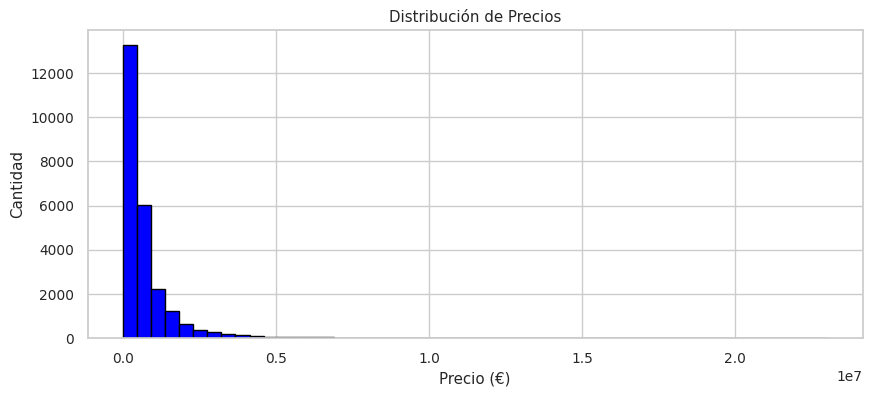

In [260]:
plt.figure(figsize=(10,4))
plt.hist(df['price'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio (€)')
plt.ylabel('Cantidad')
plt.show()

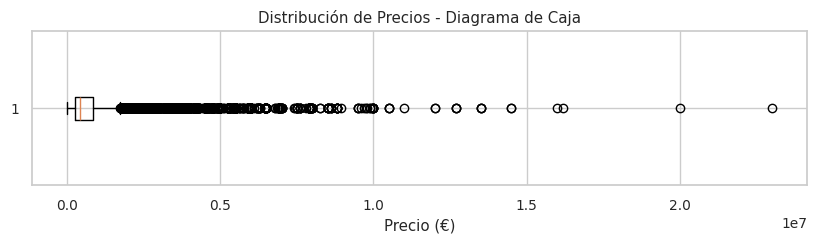

In [261]:
plt.figure(figsize=(10,2))
plt.boxplot(df['price'], vert=False)
plt.title('Distribución de Precios - Diagrama de Caja')
plt.xlabel('Precio (€)')
plt.show()

Límites para outliers de precio: -642500.00 - 1729500.00
Filas antes de eliminar outliers: 24822
Filas después de eliminar outliers: 22527


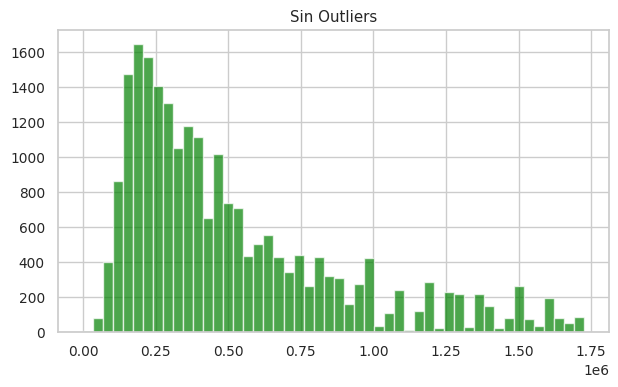

In [262]:
# ---------------------------
# 1. Eliminar outliers de precio
# ---------------------------
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Límites para outliers de precio: {lower_bound:.2f} - {upper_bound:.2f}")
print(f"Filas antes de eliminar outliers: {len(df)}")

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()
print(f"Filas después de eliminar outliers: {len(df)}")

# Visualización
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.hist(df['price'], bins=50, color='green', alpha=0.7)
plt.title('Sin Outliers')
plt.tight_layout()
plt.show()

In [263]:
# ---------------------------
# 2. Limpiar columna 'floor' (versión corregida)
# ---------------------------
# Extraer números y convertir a float
df['floor'] = df['floor'].str.extract(r'(\d+)', expand=False).astype(float)

# Reemplazar NaN con 0 y convertir a entero
df['floor'] = df['floor'].fillna(0).astype(int)

# Verificación mejorada
unique_floors = df['floor'].unique()
print("\nValores únicos en 'floor':", sorted(unique_floors))
print("Tipo de datos de 'floor':", df['floor'].dtype)
print("Valores nulos restantes:", df['floor'].isnull().sum())


Valores únicos en 'floor': [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(20), np.int64(22), np.int64(46), np.int64(60)]
Tipo de datos de 'floor': int64
Valores nulos restantes: 0


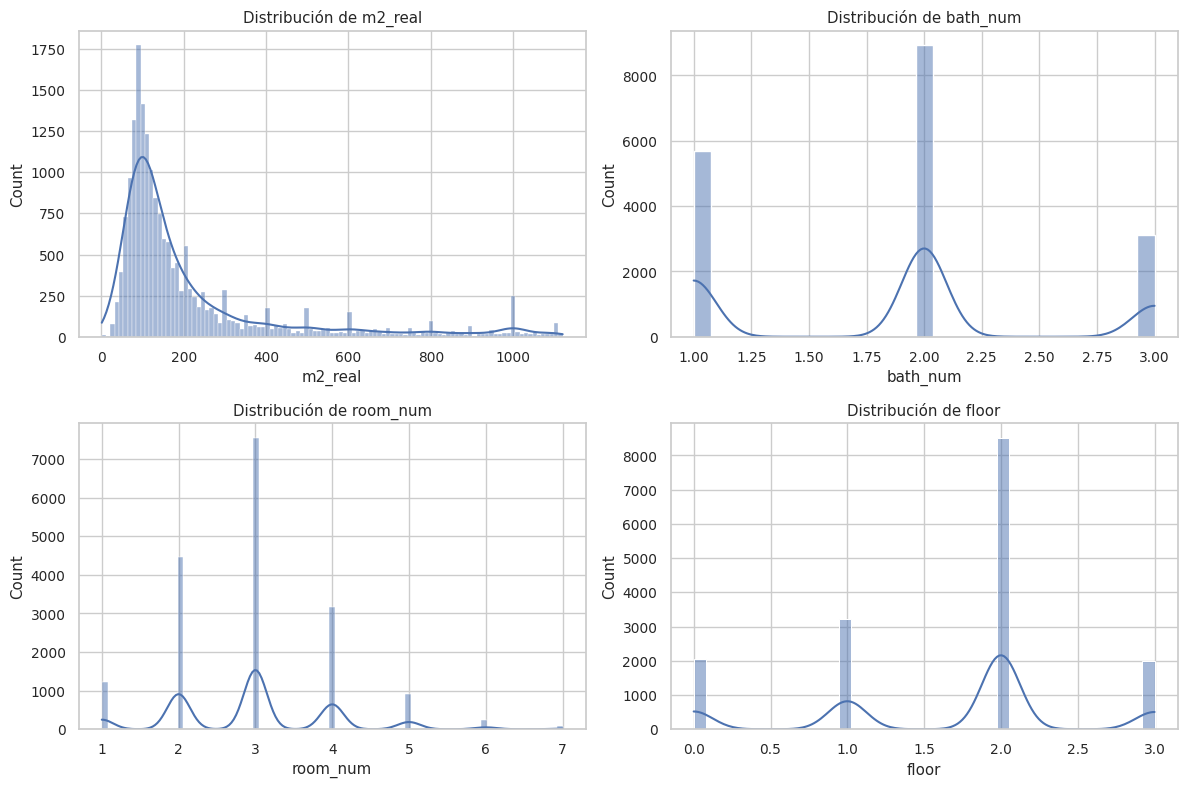

In [264]:
# ---------------------------
# 3. Eliminar outliers en variables numéricas
# ---------------------------
numeric_columns = ['m2_real', 'bath_num', 'room_num', 'floor']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_columns, 1):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lb, ub = Q1-1.5*IQR, Q3+1.5*IQR
    
    df = df[(df[col] >= lb) & (df[col] <= ub)]
    
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

In [265]:
# ---------------------------
# 4. Codificación One-Hot
# ---------------------------
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[['condition']])
encoded_df = pd.DataFrame(encoded_features, 
                        columns=['cond_nueva', 'cond_buen_estado', 'cond_reformar'])

In [266]:
# ---------------------------
# 5. Normalización numérica
# ---------------------------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_columns])
scaled_df = pd.DataFrame(scaled_features, 
                        columns=[f'scaled_{col}' for col in numeric_columns])

In [267]:
# ---------------------------
# 6. Unir transformaciones y limpiar
# ---------------------------
# Mantener solo columnas binarias + transformaciones
df = pd.concat([
    df[['air_conditioner', 'balcony', 'chimney', 'garden', 
       'reduced_mobility', 'storage_room', 'swimming_pool', 'terrace']],
    encoded_df,
    scaled_df,
    df['price']
], axis=1)

print("\nDataset final procesado:")
display(df.head())
print("\nEstructura final:")
print(f"- Variables binarias: {8}")
print(f"- Condiciones codificadas: {3}")
print(f"- Variables escaladas: {len(numeric_columns)}")
print(f"- Total: {df.shape[1]} columnas y {df.shape[0]} filas")


Dataset final procesado:


,air_conditioner,balcony,chimney,garden,reduced_mobility,storage_room,swimming_pool,terrace,cond_nueva,cond_buen_estado,cond_reformar,scaled_m2_real,scaled_bath_num,scaled_room_num,scaled_floor,price
0,1,0,0,1,0,0,1,1,0.0,1.0,0.0,-0.277945,0.184292,-0.912994,1.560585,550000.0
1,1,0,0,0,0,0,0,0,0.0,1.0,0.0,-0.718327,-1.261271,-1.859283,-0.772085,240000.0
3,0,0,0,1,0,0,0,1,0.0,1.0,0.0,-0.277945,0.184292,0.033295,0.394250,300000.0
4,1,1,0,1,0,0,1,1,0.0,1.0,0.0,0.417396,1.629856,3.818450,0.394250,485000.0
6,0,0,0,0,0,0,0,0,0.0,1.0,0.0,-0.050800,0.184292,0.033295,0.394250,1500000.0



Estructura final:
- Variables binarias: 8
- Condiciones codificadas: 3
- Variables escaladas: 4
- Total: 16 columnas y 21457 filas


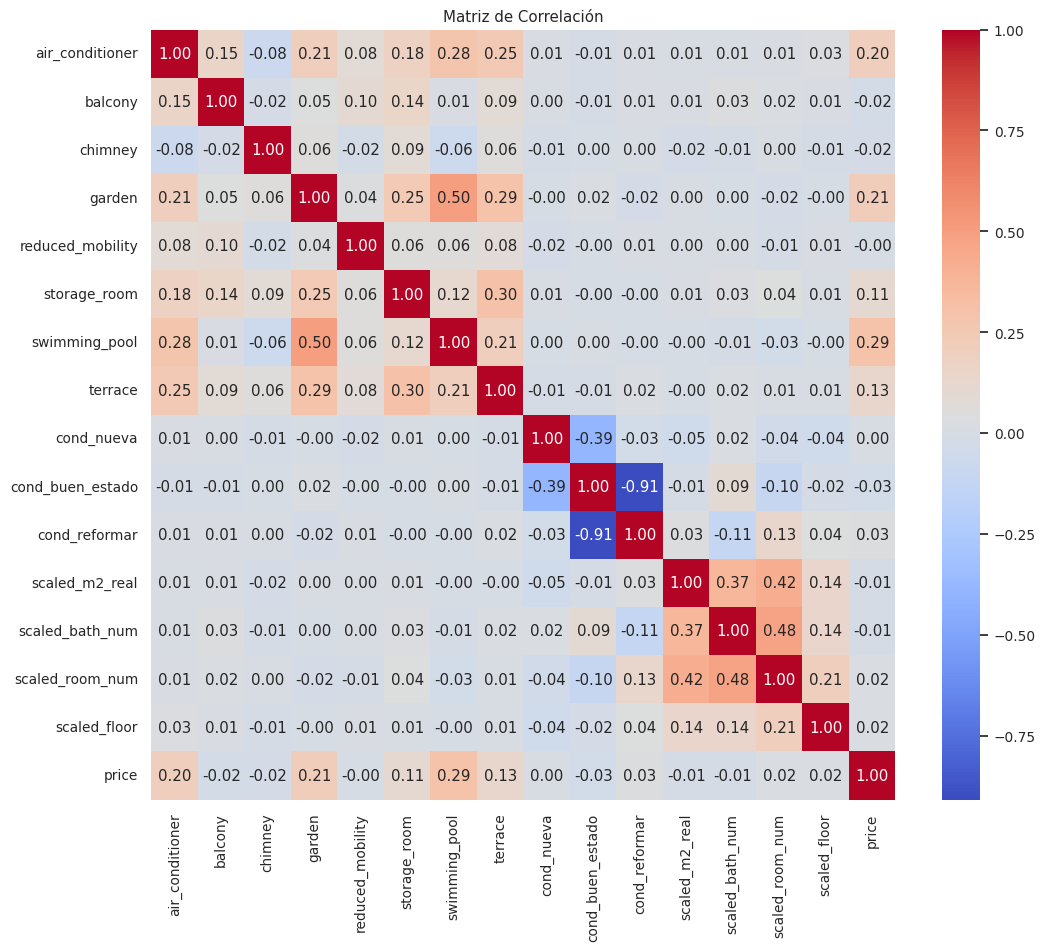

Correlación de las variables con 'price':
swimming_pool       0.294813
garden              0.211191
air_conditioner     0.202551
terrace             0.134927
storage_room        0.111781
cond_reformar       0.033956
scaled_room_num     0.020515
scaled_floor        0.020113
cond_nueva          0.001897
reduced_mobility   -0.003365
scaled_m2_real     -0.008693
scaled_bath_num    -0.012839
chimney            -0.016181
balcony            -0.021786
cond_buen_estado   -0.032166
Name: price, dtype: float64

Variables con alta correlación (|corr| > 0.7) con 'price':
Series([], Name: price, dtype: float64)


In [268]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar el heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Analizar la correlación de cada variable con 'price'
corr_with_price = corr_matrix['price'].drop('price').sort_values(ascending=False)
print("Correlación de las variables con 'price':")
print(corr_with_price)

# Ejemplo de criterio para eliminar variables redundantes:
# Se podría eliminar variables que tengan una correlación absoluta muy alta entre sí (por ejemplo, |corr| > 0.8)
# o aquellas que tengan muy baja correlación con 'price'.
# Aquí se muestra un ejemplo para identificar variables con alta correlación absoluta con 'price':
umbral = 0.7  # umbral para considerar una alta correlación
variables_altamente_correlacionadas = corr_with_price[abs(corr_with_price) > umbral]
print("\nVariables con alta correlación (|corr| > {}) con 'price':".format(umbral))
print(variables_altamente_correlacionadas)

# Con base en este análisis, se podría decidir eliminar algunas variables redundantes.

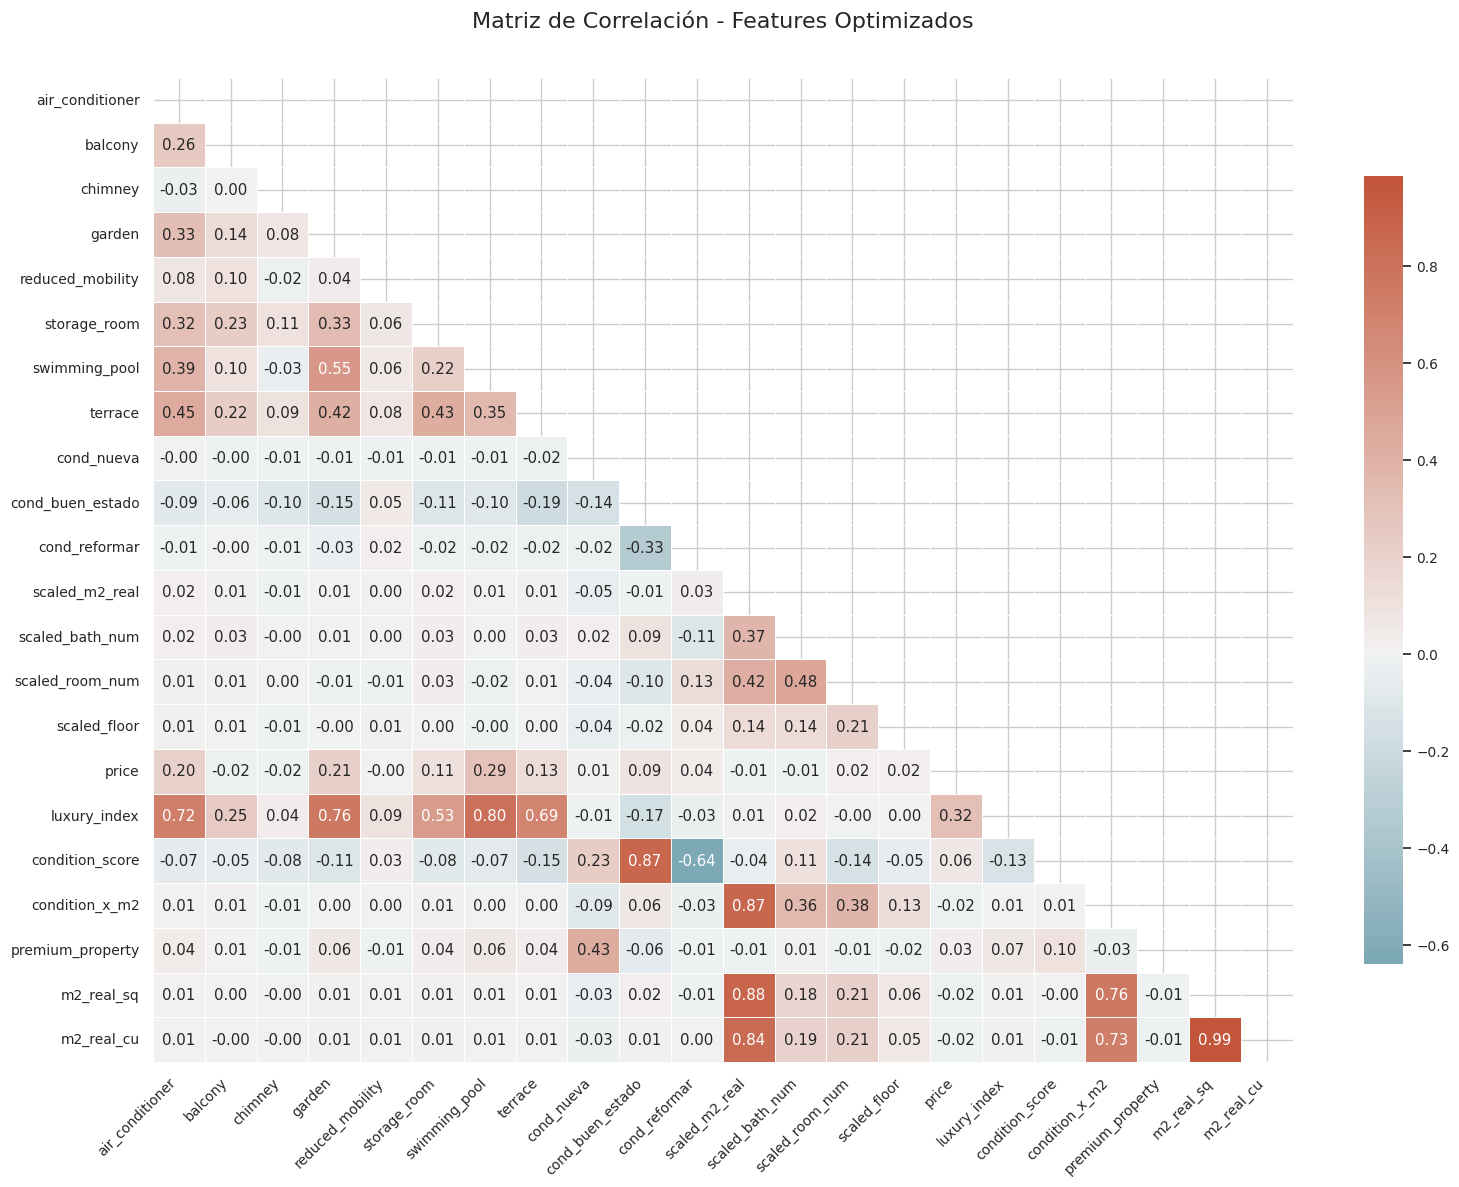


Top 10 Correlaciones con Price:


price               1.000000
luxury_index        0.321318
swimming_pool       0.294813
garden              0.211191
air_conditioner     0.202551
terrace             0.134927
storage_room        0.111781
cond_buen_estado    0.087074
condition_score     0.059714
cond_reformar       0.044964
Name: price, dtype: float64


Features Altamente Correlacionados:


,level_0,level_1,0
1,air_conditioner,luxury_index,0.715967
5,garden,luxury_index,0.760600
9,swimming_pool,luxury_index,0.798952
13,cond_buen_estado,condition_score,0.867799
16,scaled_m2_real,condition_x_m2,0.870737
17,scaled_m2_real,m2_real_sq,0.880219
18,scaled_m2_real,m2_real_cu,0.840715
23,luxury_index,air_conditioner,0.715967
24,luxury_index,garden,0.760600
25,luxury_index,swimming_pool,0.798952



Correlación Nuevos Features con Price:


luxury_index        0.321318
condition_x_m2     -0.018744
premium_property    0.027310
m2_real_sq         -0.019392
Name: price, dtype: float64


Estructura Final del Dataset:
- Registros: 21457
- Variables: 14

Primeras filas:


,scaled_m2_real,scaled_bath_num,scaled_floor,luxury_index,condition_x_m2,premium_property,m2_real_sq,m2_real_cu,cond_nueva,cond_buen_estado,swimming_pool,air_conditioner,terrace,price
0,-0.277945,0.184292,1.560585,0.843482,-0.277945,0,0.077253,-0.021472,0,1,1,1,1,550000.0
1,-0.718327,-1.261271,-0.772085,0.202551,-0.718327,0,0.515994,-0.370653,0,1,0,1,0,240000.0
3,-0.277945,0.184292,0.394250,0.346118,-0.277945,0,0.077253,-0.021472,0,1,0,0,1,300000.0


In [269]:
#%% [markdown]
## 2.2 Análisis de Correlación y Feature Engineering Mejorado

#%% 1. Limpieza y transformación final de datos
# ---------------------------------------------
# Convertir todas las variables binarias a enteros (asegurar consistencia)
binary_cols = ['swimming_pool', 'air_conditioner', 'terrace', 'garden',
               'storage_room', 'balcony', 'chimney', 
               'cond_nueva', 'cond_buen_estado', 'cond_reformar']

df[binary_cols] = df[binary_cols].fillna(0).astype(int)

#%% 2. Feature Engineering Optimizado
# -----------------------------------
# Calcular pesos basados en correlación real
amenity_correlations = df[['swimming_pool', 'air_conditioner', 'terrace', 
                          'garden', 'storage_room']].corrwith(df['price'])

# 2.1 Luxury Index con pesos estadísticos
df['luxury_index'] = df[amenity_correlations.index].mul(amenity_correlations.values).sum(axis=1)

# 2.2 Condition Score mejorado con interacción
df['condition_score'] = (2 * df['cond_nueva'] + df['cond_buen_estado'] - df['cond_reformar'])
df['condition_x_m2'] = df['condition_score'] * df['scaled_m2_real']  # Interacción clave

# 2.3 Variable Premium (combinación estratégica)
luxury_threshold = df['luxury_index'].quantile(0.75)
condition_threshold = df['condition_score'].quantile(0.75)
df['premium_property'] = ((df['luxury_index'] > luxury_threshold) & 
                         (df['condition_score'] > condition_threshold)).astype(int)

# 2.4 Términos no lineales para metros cuadrados
df['m2_real_sq'] = df['scaled_m2_real'] ** 2
df['m2_real_cu'] = df['scaled_m2_real'] ** 3

#%% 3. Análisis de Correlación Mejorado
# -------------------------------------
# Configuración profesional del heatmap
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()

# Máscara y paleta mejoradas
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Heatmap con anotaciones estratégicas
sns.heatmap(corr_matrix, 
            mask=mask,
            cmap=cmap,
            annot=True,
            fmt=".2f",
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

# Ajustes de visualización
plt.title("Matriz de Correlación - Features Optimizados\n", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

#%% 4. Análisis de Features Clave
# -------------------------------
# 4.1 Correlaciones con precio ordenadas
price_corr = corr_matrix['price'].sort_values(ascending=False)
print("\nTop 10 Correlaciones con Price:")
display(price_corr.head(10))

# 4.2 Redundancias entre features
high_corr = corr_matrix[corr_matrix.abs() > 0.7].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
print("\nFeatures Altamente Correlacionados:")
display(high_corr)

# 4.3 Validación de nuevos features
new_features = ['luxury_index', 'condition_x_m2', 'premium_property', 'm2_real_sq']
print("\nCorrelación Nuevos Features con Price:")
display(price_corr[new_features])

#%% 5. Exportar Dataset Procesado
# -------------------------------
# Ordenar columnas estratégicamente
final_columns = [
    'scaled_m2_real', 'scaled_bath_num', 'scaled_floor',  # Variables núcleo
    'luxury_index', 'condition_x_m2', 'premium_property',  # Nuevos features
    'm2_real_sq', 'm2_real_cu',                           # Términos no lineales
    'cond_nueva', 'cond_buen_estado',                      # Condiciones relevantes
    'swimming_pool', 'air_conditioner', 'terrace',         # Amenities clave
    'price'                                                # Target
]

df_final = df[final_columns]

print("\nEstructura Final del Dataset:")
print(f"- Registros: {df_final.shape[0]}")
print(f"- Variables: {df_final.shape[1]}")
print("\nPrimeras filas:")
display(df_final.head(3))


Top 10 Correlaciones con log_price:
log_price           1.000000
price               0.907043
price_per_m2        0.904978
luxury_index        0.368936
swimming_pool       0.318405
air_conditioner     0.253655
terrace             0.180111
cond_buen_estado    0.116198
premium_property    0.115419
scaled_floor        0.026873
Name: log_price, dtype: float64

Distribución de premium_property:
premium_property
0    0.977024
1    0.022976
Name: proportion, dtype: float64


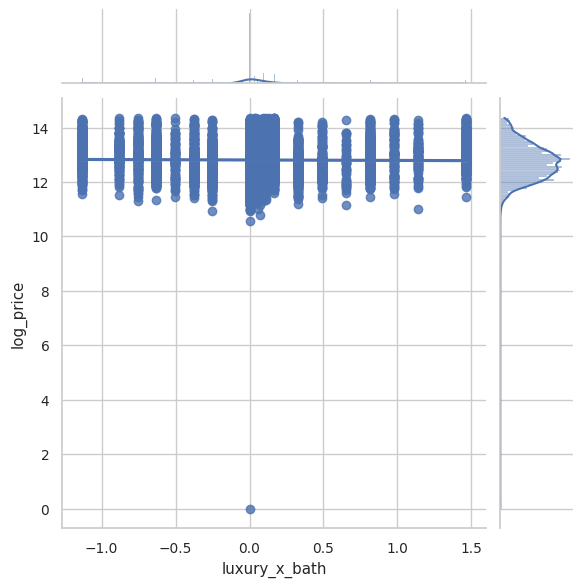

In [270]:
#%% [markdown]
## 2.3 Optimización Final de Features (Versión Mejorada)
# -----------------------------------------------------

# 1. Eliminación estratégica de features (conservando cond_buen_estado)
df_final = df_final.drop(columns=[
    'condition_x_m2', 
    'm2_real_sq', 
    'm2_real_cu'
])

# 2. Cálculo correcto de luxury_index con operaciones vectorizadas
amenity_weights = np.array([0.4, 0.3, 0.2])  # swimming_pool, air_conditioner, terrace
df_final['luxury_index'] = df_final[['swimming_pool', 'air_conditioner', 'terrace']].dot(amenity_weights)

# 3. Definición estadística de premium_property
luxury_threshold = df_final['luxury_index'].quantile(0.85)
m2_threshold = df_final['scaled_m2_real'].quantile(0.75)
df_final['premium_property'] = (
    (df_final['luxury_index'] > luxury_threshold) & 
    (df_final['scaled_m2_real'] > m2_threshold)
).astype(int)

# 4. Nueva interacción significativa (lujo + baños)
df_final['luxury_x_bath'] = df_final['luxury_index'] * df_final['scaled_bath_num']

# 5. Transformación logarítmica mejorada
df_final['log_price'] = np.log(df_final['price'])  # Usar log natural para mejor interpretación

# 6. Feature adicional: ratio precio/m2
df_final['price_per_m2'] = df_final['price'] / df_final['scaled_m2_real'].apply(lambda x: x*100 + 1000)  # Escalar inverso

#%% Resultados Optimizados y Validación
corr_matrix_v2 = df_final.corr()

print("\nTop 10 Correlaciones con log_price:")
print(corr_matrix_v2['log_price'].abs().sort_values(ascending=False).head(10))

print("\nDistribución de premium_property:")
print(df_final['premium_property'].value_counts(normalize=True))

# Visualización de relaciones clave
sns.jointplot(x='luxury_x_bath', y='log_price', data=df_final, kind='reg')
plt.show()